### MCMC Plots

In [1]:
#--------------- Packages ---------------#
%load_ext autoreload
%autoreload 2
import emcee
import random
import Corrfunc
import numpy as np
from classy import Class
import cluster_toolkit as ctk
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from chainconsumer import ChainConsumer
from colossus.cosmology import cosmology
from cluster_toolkit import miscentering
from colossus.cosmology import cosmology
from colossus.halo import concentration, profile_nfw, profile_composite
plt.style.use("~/Titus/Lensing/mass_calibration_of_DM_halos/CustomizingPlots")
%matplotlib inline

In [2]:
burnin = 1000
readerfile0 = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bov_phys_units_Fig9_mcmc_results_l6_z0.h5"
reader = emcee.backends.HDFBackend(readerfile0)
samples0 = reader.get_chain()
flat_samples0 = reader.get_chain(discard=burnin, flat=True)

lnprob = reader.get_log_prob(discard=burnin, flat=True)
best_fit_params  = flat_samples0[np.argmax(lnprob)]
best_fit_params

array([14.79046578,  5.63831825,  0.23407006,  1.33337376,  0.17514712,
        0.27658096,  1.01797281])

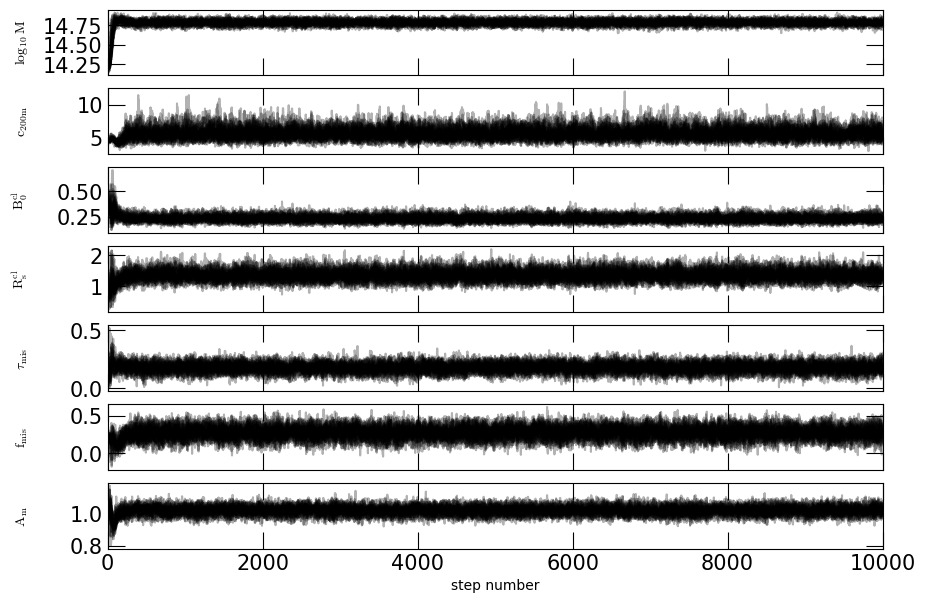

In [3]:
import corner
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'cm'

fig, axes = plt.subplots(7, figsize=(10, 7), sharex=True)
labels2 = [r"$\rm \log_{10}M$", r"$\rm c_{200m}$", r"$\rm B^{cl}_0$", r"$\rm R^{cl}_s$", r"$\rm \tau_{mis}$", r"$\rm f_{mis}$", r"$\rm A_m$"]
names = ["M", "c", "B", "Rs", "tau", "fmis", "Am"]
for i in range(7):
    ax = axes[i]
    ax.plot(samples0[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples0))
    ax.set_ylabel(labels2[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [4]:
## Final (changed covariance) - mini Uchuu
mean_mass_true_arr = [1.971057e+14, 2.865907e+14, 4.064710e+14, 6.429285e+14] #new data, true_mass*h mini Uchuu
# true_params = np.array([np.log10(mean_mass_true_arr[0]), 5.81, 0.34, 0.44, 0.17, 0.25, 1.021]) #l3_z0 
# true_params = np.array([np.log10(mean_mass_true_arr[1]), 4.53, 0.37, 0.5, 0.17, 0.25, 1.021]) #l4_z0
# true_params = np.array([np.log10(mean_mass_true_arr[2]), 4.38, 0.27, 0.8, 0.17, 0.25, 1.021]) #l5_z0
true_params = np.array([np.log10(mean_mass_true_arr[3]), 4.65, 0.23, 1.37, 0.17, 0.25, 1.021]) #l6_z0

print(np.log10(mean_mass_true_arr))
# true_params

[14.29469918 14.45726209 14.60902957 14.80816268]


In [5]:
# from chainconsumer import ChainConsumer
# %matplotlib inline

# # log10_M, c, tau, fmis, Am, B0, Rs 
# new_flat_samples = np.stack([flat_samples0[:,0], flat_samples0[:,1], 
#                              flat_samples0[:,4], flat_samples0[:,5], 
#                              flat_samples0[:,6], flat_samples0[:,2], 
#                              flat_samples0[:,3]], axis = 1)

# # If you pass in parameter labels and only one chain, you can also get parameter bounds
# labels21 = [r"$\rm \log_{10}\mathit{M}_{200m}$", r"$\rm \mathit{c}_{200m}$", r"$\rm \mathit{\tau}_{mis}$", r"$\rm \mathit{f}_{mis}$", r"$\rm \mathit{A_m}$", r"$\rm \mathit{B}^{cl}_0$", r"$\rm \mathit{R}^{cl}_\mathit{s}$"]
# c = ChainConsumer()
# true_params2 = np.array([true_params[0], true_params[1], 
#                          true_params[4], true_params[5], 
#                          true_params[6], true_params[2], 
#                          true_params[3]]) 
# c.add_chain(new_flat_samples, parameters=labels21)
# c.configure(summary=True, spacing=0.0, diagonal_tick_labels=True, 
#             tick_font_size=11, label_font_size=25, max_ticks=5, 
#             shade_gradient=[0.75], colors=['blue'], sigma2d=False,
#             # sigmas=[1, 2, 3], shade_alpha=1.0, smooth = 30, #smooth = True,  #kde = True,
#             sigmas=[1, 2, 3], shade_alpha=1.0, smooth = True,  #kde = True,
#             summary_area=0.6827, contour_labels = None, 
#             contour_label_font_size = 0, flip=True, bar_shade=True)
# c.configure_truth(color='k', ls="--", alpha=1.0)
# # c.analysis.get_summary(parameters=labels2)
# fig = c.plotter.plot(display=True, figsize="column", truth=true_params2)

# fig.set_size_inches(11 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

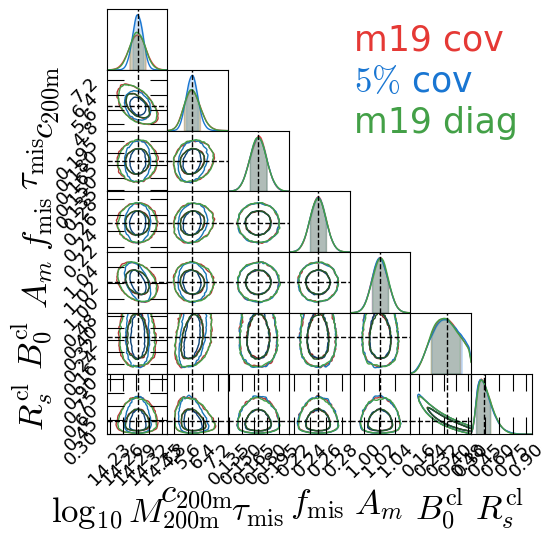

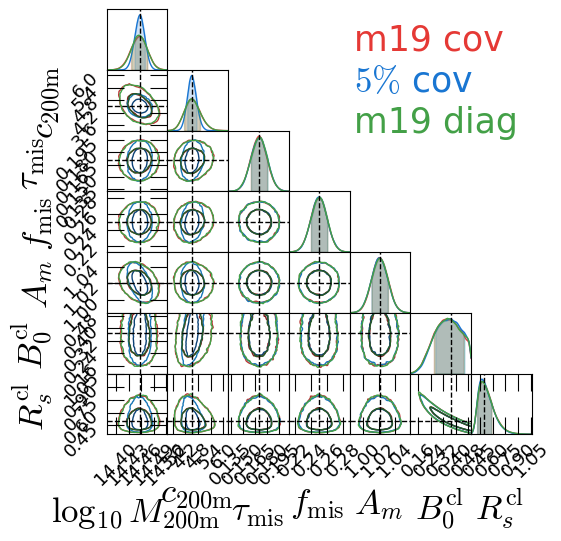

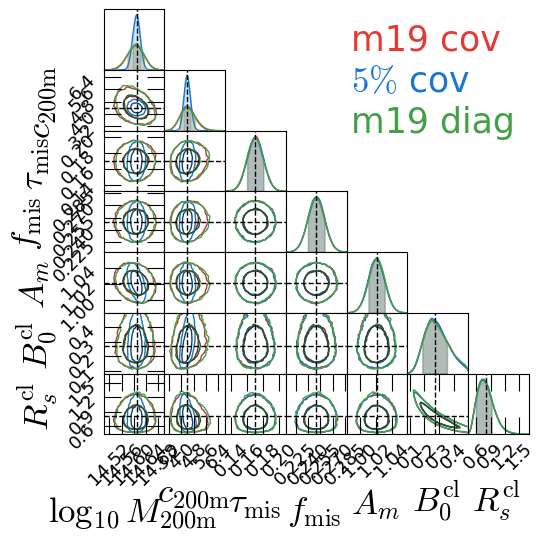

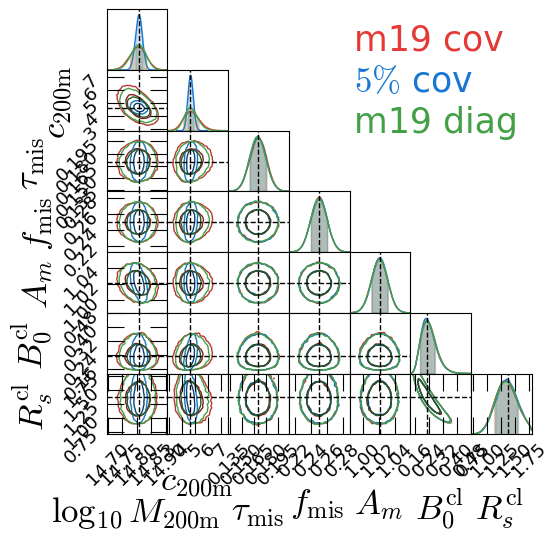

In [6]:
%matplotlib inline

# File paths for MCMC results
mcmc_path = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/"
readerfile_m19_diag_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_diag_cov_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_m19_diag_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_diag_cov_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_m19_diag_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_diag_cov_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_m19_diag_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_diag_cov_final_final_Fig9_mcmc_results_l6_z0.h5"

readerfile_5per_cov_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_5per_cov_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_5per_cov_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_5per_cov_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_5per_cov_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_5per_cov_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_5per_cov_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_5per_cov_final_final_Fig9_mcmc_results_l6_z0.h5"

readerfile_m19_cov_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_cov_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_m19_cov_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_cov_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_m19_cov_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_cov_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_m19_cov_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_m19_cov_final_final_Fig9_mcmc_results_l6_z0.h5"

## Final (changed covariance) - mini Uchuu
# mean_mass_true_arr = [1.971057e+14, 2.865907e+14, 4.064710e+14, 6.429285e+14] #new data, true_mass*h mini Uchuu
params0 = np.array([np.log10(mean_mass_true_arr[0]), 5.81, 0.34, 0.44, 0.17, 0.25, 1.021]) #l3_z0 
params1 = np.array([np.log10(mean_mass_true_arr[1]), 4.53, 0.37, 0.5, 0.17, 0.25, 1.021]) #l4_z0
params2 = np.array([np.log10(mean_mass_true_arr[2]), 4.38, 0.27, 0.8, 0.17, 0.25, 1.021]) #l5_z0
params3 = np.array([np.log10(mean_mass_true_arr[3]), 4.65, 0.23, 1.37, 0.17, 0.25, 1.021]) #l6_z0
params = [params0, params1, params2, params3]

file_list = [
    [readerfile_m19_diag_0, readerfile_5per_cov_0, readerfile_m19_cov_0],
    [readerfile_m19_diag_1, readerfile_5per_cov_1, readerfile_m19_cov_1],
    [readerfile_m19_diag_2, readerfile_5per_cov_2, readerfile_m19_cov_2],
    [readerfile_m19_diag_3, readerfile_5per_cov_3, readerfile_m19_cov_3]
]

labels21 = [r"$\rm \log_{10}\mathit{M}_{200m}$", r"$\rm \mathit{c}_{200m}$", r"$\rm \mathit{\tau}_{mis}$", r"$\rm \mathit{f}_{mis}$", r"$\rm \mathit{A_m}$", r"$\rm \mathit{B}^{cl}_0$", r"$\rm \mathit{R}^{cl}_\mathit{s}$"]
names = ["M", "c", "B", "Rs", "tau", "fmis", "Am"]
burnin = 1000

for i in range(4):
    readerfile0 = file_list[i][0]
    readerfile1 = file_list[i][1]
    readerfile2 = file_list[i][2]

    reader0 = emcee.backends.HDFBackend(mcmc_path+readerfile0)
    reader1 = emcee.backends.HDFBackend(mcmc_path+readerfile1)
    reader2 = emcee.backends.HDFBackend(mcmc_path+readerfile2)

    flat_samples0 = reader0.get_chain(discard=burnin, flat=True)
    flat_samples1 = reader1.get_chain(discard=burnin, flat=True)
    flat_samples2 = reader2.get_chain(discard=burnin, flat=True)
    
    # all radii
    new_flat_samples0 = np.stack([flat_samples0[:,0], flat_samples0[:,1], 
                                 flat_samples0[:,4], flat_samples0[:,5], 
                                 flat_samples0[:,6], flat_samples0[:,2], 
                                 flat_samples0[:,3]], axis=1)
    
    # small radii
    new_flat_samples1 = np.stack([flat_samples1[:,0], flat_samples1[:,1], 
                                 flat_samples1[:,4], flat_samples1[:,5], 
                                 flat_samples1[:,6], flat_samples1[:,2], 
                                 flat_samples1[:,3]], axis=1)
    
    # large radii
    new_flat_samples2 = np.stack([flat_samples2[:,0], flat_samples2[:,1], 
                                 flat_samples2[:,4], flat_samples2[:,5], 
                                 flat_samples2[:,6], flat_samples2[:,2], 
                                 flat_samples2[:,3]], axis=1)
    
    true_params = np.array([params[i][0], params[i][1], 
                             params[i][4], params[i][5], 
                             params[i][6], params[i][2], 
                             params[i][3]]) 
    
    ##############
    chain = ChainConsumer()
    chain.add_chain(new_flat_samples2, parameters=labels21, name=r"m19 cov")
    chain.add_chain(new_flat_samples1, parameters=labels21, name=r"$5\%$ cov")
    chain.add_chain(new_flat_samples0, parameters=labels21, name=r"m19 diag")
    
    ##############
    chain.configure(summary=True, spacing=0.0, diagonal_tick_labels=True, 
                tick_font_size=13, label_font_size=25, max_ticks=5, 
                shade_gradient=1.0, colors=['red', 'blue', 'green'], sigma2d=False,
                sigmas=[1, 2], shade_alpha=[0.0, 0.0, 0.0], smooth = True, #kde = True, 
                summary_area=0.6827, contour_labels = None, 
                contour_label_font_size = 0, flip=True, bar_shade=True)
    chain.configure_truth(color='k', ls="--", alpha=1.0)
    chain.analysis.get_summary(parameters=labels21)
    fig = chain.plotter.plot(display=True, figsize="column", truth=true_params)
    fig.set_size_inches(11 + fig.get_size_inches())  # Resize fig for doco. You don't need this.


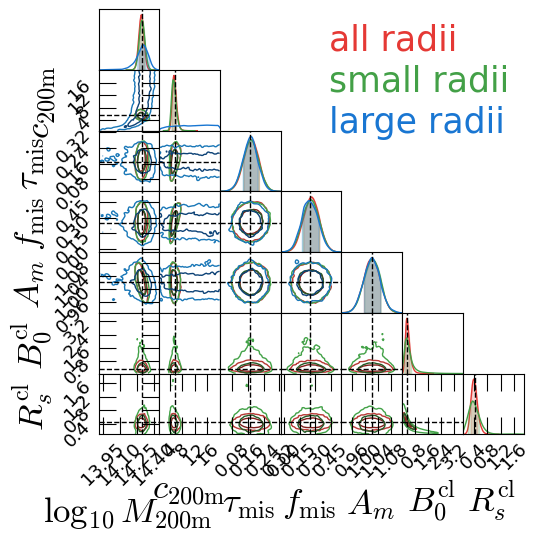

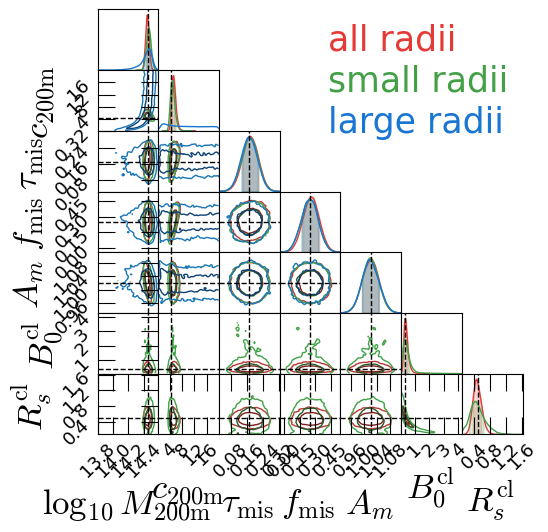

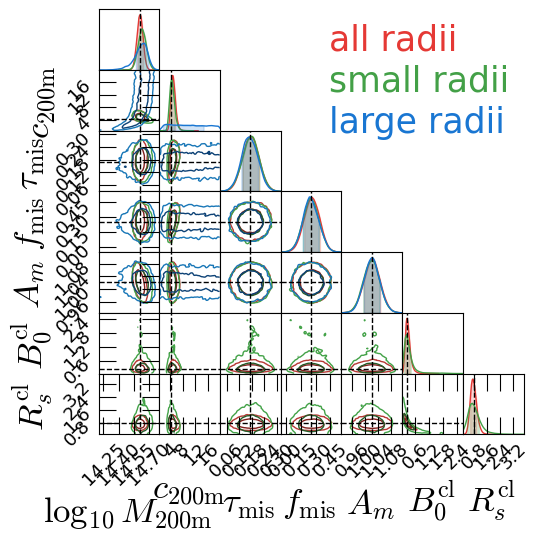

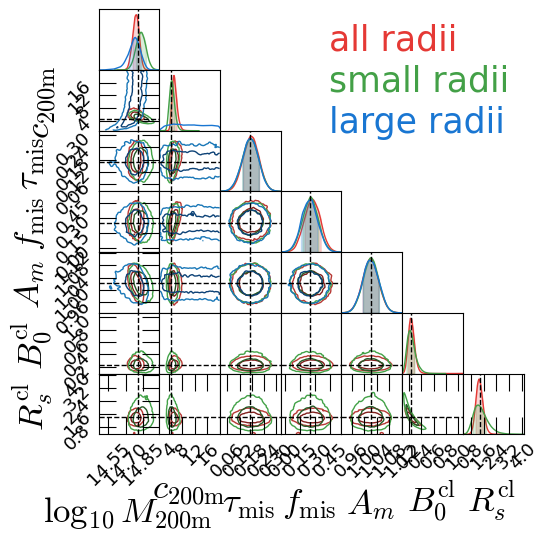

In [7]:
# File paths for MCMC results
mcmc_path = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/"
readerfile_all_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_all_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_all_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_all_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l6_z0.h5"

readerfile_small_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_small_scale_0.2_3_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_small_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_small_scale_0.2_3_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_small_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_small_scale_0.2_3_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_small_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_small_scale_0.2_3_final_final_Fig9_mcmc_results_l6_z0.h5"

readerfile_large_0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_large_scale_3_30_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_large_1 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_large_scale_3_30_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_large_2 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_large_scale_3_30_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_large_3 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_large_scale_3_30_final_Fig9_mcmc_results_l6_z0.h5"

params0 = np.array([np.log10(mean_mass_true_arr[0]), 5.81, 0.34, 0.44, 0.17, 0.25, 1.021]) #l3_z0 
params1 = np.array([np.log10(mean_mass_true_arr[1]), 4.53, 0.37, 0.5, 0.17, 0.25, 1.021]) #l4_z0
params2 = np.array([np.log10(mean_mass_true_arr[2]), 4.38, 0.27, 0.8, 0.17, 0.25, 1.021]) #l5_z0
params3 = np.array([np.log10(mean_mass_true_arr[3]), 4.65, 0.23, 1.37, 0.17, 0.25, 1.021]) #l6_z0
params = [params0, params1, params2, params3]

file_list = [
    [readerfile_all_0, readerfile_small_0, readerfile_large_0],
    [readerfile_all_1, readerfile_small_1, readerfile_large_1],
    [readerfile_all_2, readerfile_small_2, readerfile_large_2],
    [readerfile_all_3, readerfile_small_3, readerfile_large_3]
]

labels21 = [r"$\rm \log_{10}\mathit{M}_{200m}$", r"$\rm \mathit{c}_{200m}$", r"$\rm \mathit{\tau}_{mis}$", r"$\rm \mathit{f}_{mis}$", r"$\rm \mathit{A_m}$", r"$\rm \mathit{B}^{cl}_0$", r"$\rm \mathit{R}^{cl}_\mathit{s}$"]
labels21_large = [r"$\rm \log_{10}\mathit{M}_{200m}$", r"$\rm \mathit{c}_{200m}$", r"$\rm \mathit{\tau}_{mis}$", r"$\rm \mathit{f}_{mis}$", r"$\rm \mathit{A_m}$"]
names = ["M", "c", "B", "Rs", "tau", "fmis", "Am"]
burnin = 1000

for i in range(4):
    readerfile0 = file_list[i][0]
    readerfile1 = file_list[i][1]
    readerfile2 = file_list[i][2]

    reader0 = emcee.backends.HDFBackend(mcmc_path+readerfile0)
    reader1 = emcee.backends.HDFBackend(mcmc_path+readerfile1)
    reader2 = emcee.backends.HDFBackend(mcmc_path+readerfile2)

    flat_samples0 = reader0.get_chain(discard=burnin, flat=True)
    flat_samples1 = reader1.get_chain(discard=burnin, flat=True)
    flat_samples2 = reader2.get_chain(discard=burnin, flat=True)
    
    # all radii
    new_flat_samples0 = np.stack([flat_samples0[:,0], flat_samples0[:,1], 
                                 flat_samples0[:,4], flat_samples0[:,5], 
                                 flat_samples0[:,6], flat_samples0[:,2], 
                                 flat_samples0[:,3]], axis=1)
    
    # small radii
    new_flat_samples1 = np.stack([flat_samples1[:,0], flat_samples1[:,1], 
                                 flat_samples1[:,4], flat_samples1[:,5], 
                                 flat_samples1[:,6], flat_samples1[:,2], 
                                 flat_samples1[:,3]], axis=1)
    
    # large radii
    new_flat_samples2 = np.stack([flat_samples2[:,0], flat_samples2[:,1], 
                                 flat_samples2[:,4], flat_samples2[:,5], 
                                 flat_samples2[:,6]], axis=1)
    
    true_params = np.array([params[i][0], params[i][1], 
                             params[i][4], params[i][5], 
                             params[i][6], params[i][2], 
                             params[i][3]]) 
    
    ##############
    chain = ChainConsumer()
    chain.add_chain(new_flat_samples0, parameters=labels21, name="all radii")
    chain.add_chain(new_flat_samples1, parameters=labels21, name="small radii")
    chain.add_chain(new_flat_samples2, parameters=labels21_large, name="large radii")
    
    ##############
    chain.configure(summary=True, spacing=0.0, diagonal_tick_labels=True, 
                tick_font_size=13, label_font_size=25, max_ticks=5, 
                shade_gradient=1.0, colors=['red', 'green', 'blue'], sigma2d=False,
                sigmas=[1, 2], shade_alpha=[0.0, 0.0, 0.0], smooth = True, #kde = True, 
                summary_area=0.6827, contour_labels = None, 
                contour_label_font_size = 0, flip=True, bar_shade=True)
    chain.configure_truth(color='k', ls="--", alpha=1.0)
    chain.analysis.get_summary(parameters=labels21)
    fig = chain.plotter.plot(display=True, figsize="column", truth=true_params)
    fig.set_size_inches(11 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [8]:
## true mass
mean_mass_true_arr = [1.971057e+14, 2.865907e+14, 4.064710e+14, 6.429285e+14] ##true mass
l3_z0 = 1.971057e+14 #true mass
l4_z0 = 2.865907e+14
l5_z0 = 4.064710e+14
l6_z0 = 6.429285e+14

# # # Mini Uchuu all radii
readerfile_l3_z0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l3_z0.h5"
readerfile_l4_z0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l4_z0.h5"
readerfile_l5_z0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l5_z0.h5"
readerfile_l6_z0 = "newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l6_z0.h5"


##################################################################################
##################################################################################
# # # # Mini Uchuu cylinder richness final: All radii final
# cyl_depth = '30'
# data_path = '/pscratch/sd/t/titus/data/'
# mass = np.load(data_path+f'mini_uchuu_mass_cylinder_richness_selection_d{cyl_depth}_no_pecvel_changing_vol_heidi_final2.npy', allow_pickle=True).item()
# l3_z0 = mass['l3_z0']
# l4_z0 = mass['l4_z0']
# l5_z0 = mass['l5_z0']
# l6_z0 = mass['l6_z0']

# # Mini Uchuu cylinder richness final: All radii final
# readerfile_l3_z0 = "cylinder_richness_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_cylinder_richness_changed_bcov_phys_units_no_sys_all_scale_depth30_Fig9_mcmc_results_l3_z0.h5"
# readerfile_l4_z0 = "cylinder_richness_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_cylinder_richness_changed_bcov_phys_units_no_sys_all_scale_depth30_Fig9_mcmc_results_l4_z0.h5"
# readerfile_l5_z0 = "cylinder_richness_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_cylinder_richness_changed_bcov_phys_units_no_sys_all_scale_depth30_Fig9_mcmc_results_l5_z0.h5"
# readerfile_l6_z0 = "cylinder_richness_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_cylinder_richness_changed_bcov_phys_units_no_sys_all_scale_depth30_Fig9_mcmc_results_l6_z0.h5"


In [9]:
filepath = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/"
def read_mcmc(readerfile, M_true, filepath = None, burnin = 100, param_type = "means"):
    if filepath is not None:
        reader = emcee.backends.HDFBackend(filepath+readerfile)
    else:
        reader = emcee.backends.HDFBackend(readerfile)
    samples = reader.get_chain()
    flat_samples = reader.get_chain(discard=burnin, flat=True)
    lnprob = reader.get_log_prob(discard=burnin, flat=True)
    uncertainty = np.std(flat_samples[:,0])
    h = 0.6774 
    if param_type == "bestfit":
        best_fit_params  = flat_samples[np.argmax(lnprob)] #best fit parameters
        M_obs = best_fit_params[0]
        C = (M_true)/(10**M_obs)
        return C, M_obs, uncertainty, best_fit_params
    elif param_type == "means":
        posterior_means = np.mean(flat_samples, axis=0) #posterior mean
        M_obs = posterior_means[0]
        C = (M_true)/(10**M_obs)
        return C, M_obs, uncertainty, posterior_means 

param_type = "means"
# param_type = "bestfit"
C_l3_z0, aa, std_l3_z0, posterior_means_l3_z0 = read_mcmc(readerfile = readerfile_l3_z0, M_true = l3_z0, filepath = filepath, param_type = param_type)
C_l4_z0, bb, std_l4_z0, posterior_means_l4_z0 = read_mcmc(readerfile = readerfile_l4_z0, M_true = l4_z0, filepath = filepath, param_type = param_type)
C_l5_z0, cc, std_l5_z0, posterior_means_l5_z0 = read_mcmc(readerfile = readerfile_l5_z0, M_true = l5_z0, filepath = filepath, param_type = param_type)
C_l6_z0, dd, std_l6_z0, posterior_means_l6_z0 = read_mcmc(readerfile = readerfile_l6_z0, M_true = l6_z0, filepath = filepath, param_type = param_type)

C_z0 = np.array([C_l3_z0, C_l4_z0, C_l5_z0, C_l6_z0])
std_arr = np.array([std_l3_z0, std_l4_z0, std_l5_z0, std_l6_z0])

### Plotting data vs best-ft model (or posterior mean)

#### Delta Sigma

In [10]:
# Set colossus cosmology
cosmo_params = {'flat': True, 'H0': 67.74, 'Om0': 0.3089, 'Ob0': 0.0486, 'sigma8': 0.8159, 'ns': 0.9667}
cosmology.addCosmology('MiniUchuu', cosmo_params)
cosmo = cosmology.setCosmology('MiniUchuu')
h = cosmo_params['H0']/100

#Start by specifying the cosmology
Omega_b = cosmo_params['Ob0']
Omega_m = cosmo_params['Om0']
Omega_cdm = Omega_m - Omega_b
sigma8 = cosmo_params['sigma8']
h = cosmo_params['H0']/100 # McClintock h value
A_s = 2.1e-9
n_s = cosmo_params['ns']

#Create a params dictionary
#Need to specify the max wavenumber
k_max = 1000 #UNITS: 1/Mpc

params = {
         'output':'mPk',
         'h':h,
         'sigma8':sigma8,
         'n_s':n_s,
         'Omega_b':Omega_b,
         'Omega_cdm':Omega_cdm,
         'P_k_max_1/Mpc':k_max,
         'z_max_pk':1.0, #Default value is 10
         'non linear':'halofit'
}

#Initialize the cosmology and compute everything
cosmo_ctk = Class()
cosmo_ctk.set(params)
cosmo_ctk.compute()

In [11]:
data_path = '/pscratch/sd/t/titus/data/'
output_loc = '/global/u2/t/titus/Titus/Lensing/output/'
nbody_loc = '/global/u2/t/titus/Titus/Lensing/data/'
lensing_loc = '/global/u2/t/titus/Titus/Lensing/data/McClintock_data/desy1_tamas/'
filepath = "/global/u2/t/titus/Titus/Lensing/codes/notebooks/mcmc_results/"

# Mini Uchuu DS profile
saved_ds_profiles_dic = nbody_loc+"saved_mini_uchuu_profiles_newdata_dic_mh_phys_units2.npy" # final
# saved_ds_profiles_dic = nbody_loc+"ds_profiles_newdata_mh_no_h1z_all_old_prior_setup_changed_bov_dic.npy" #ignore
# saved_ds_profiles_dic = nbody_loc+"saved_mini_uchuu_profiles_newdata_dic_mh.npy" #ignore

# # Mini Uchuu cylinder selection richness DS profile
# cyl_depth = '30'
# saved_ds_profiles_dic = data_path+'data/mini_uchuu_ds_cylinder_richness_selection.npy'
# saved_ds_profiles_dic = data_path+f'mini_uchuu_ds_cylinder_richness_selection_d{cyl_depth}_no_pec_vel_final.npy'

load_ds_profiles = np.load(saved_ds_profiles_dic, allow_pickle=True).item()
# ds = load_ds_profiles[lam_z_bin]
Sigma_crit_dic = {"l3_z0":2.558834359999999819e-04, "l4_z0":2.562248809999999950e-04, 
                  "l5_z0":2.559633569999999851e-04, "l6_z0":2.557816409999999962e-04, 
                  "l3_z1":2.631864830000000188e-04, "l4_z1":2.640424589999999859e-04, 
                  "l5_z1":2.630129280000000004e-04, "l6_z1":2.629873459999999808e-04, 
                  "l3_z2":2.376251149999999903e-04, "l4_z2":2.379116389999999873e-04, 
                  "l5_z2":2.372028870000000031e-04, "l6_z2":2.373956570000000036e-04}
posterior_means_dic = {"l3_z0":posterior_means_l3_z0, "l4_z0":posterior_means_l4_z0, 
                       "l5_z0":posterior_means_l5_z0, "l6_z0":posterior_means_l6_z0
                      }
readerfile_dic = {"l3_z0":readerfile_l3_z0, "l4_z0":readerfile_l4_z0, 
                  "l5_z0":readerfile_l5_z0, "l6_z0":readerfile_l6_z0
                 }
lambda_range = ["[20, 30)", "[30, 45)", "[45, 60)", "[60, ∞)"]
z = 0.3

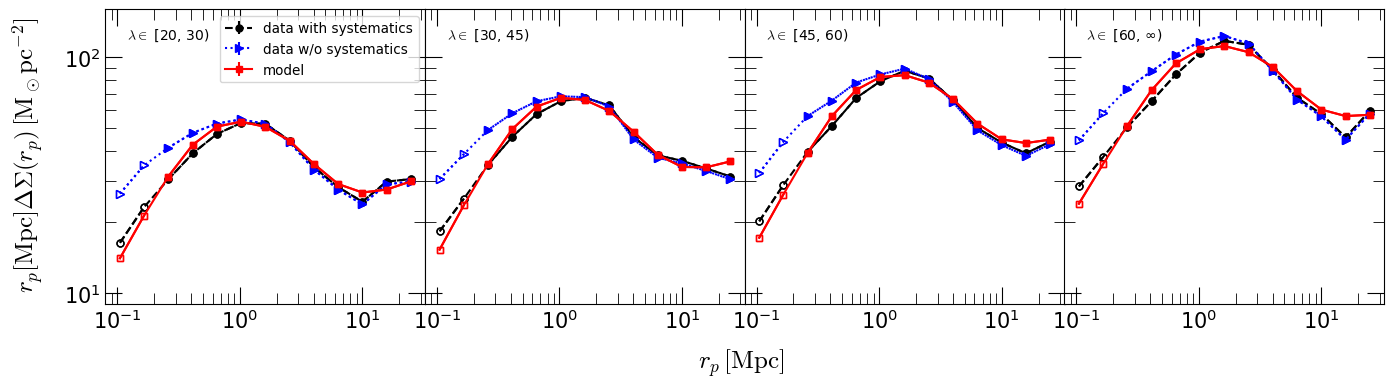

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharey=True, sharex = True)
lambdas = [23.99617, 35.86541, 51.21334, 81.45424]  # lambda values

rp = np.array([ 0.04221139,  0.06651455,  0.10516441,  0.16537565,  0.26069825, 
               0.41202975,  0.65045543,  1.02563815,  1.61857299,  2.55379112, 
               4.02731114,  6.34991963, 10.00980414, 15.784786  , 24.87216972])

profiles_without_systematics = nbody_loc+"saved_mini_uchuu_profiles_newdata_dic_mh_phys_units_raw_no_sys.npy"
DS_data_final_raw = np.load(profiles_without_systematics, allow_pickle=True).item()

for j, lam in enumerate(lambdas):
    lam_z_bin = "l"+str(j+3)+"_z0"
    
    Sigma_crit_inv0 = Sigma_crit_dic[lam_z_bin] 
    ds = load_ds_profiles[lam_z_bin]
    ds_raw_no_sys = DS_data_final_raw[lam_z_bin]
    
    # mass, concentration, B0, Rs, tau (miscentering offset), fmis, Am.
    log10_M, c, B0, Rs, tau, fmis, Am = posterior_means_dic[lam_z_bin]
    M = 10**log10_M #Msun/h

    Rlam = (lam/100)**0.2 #Mpc/h comoving #cluster radius assigned by redmapper
    Rmis = tau*Rlam #Mpc/h Radial miscentering offset. Cluster centers are wrongly identified by a distance Rmis.
    Rproj = np.logspace(-2, 2.4, num=1000, base=10) #Mpc/h Projected 2D radii. 
    R3d = np.logspace(-2, 3, num=1000, base=10) #Mpc/h comoving. 3D radii.

    # McClintock radial bins
    Rmin = 0.0323
    Rmax = 30
    nbins = 15

    Redges = np.logspace(np.log10(Rmin), np.log10(Rmax), nbins+1) #Projected radial bin edges
    Redges *= h*(1+z) #Converted to Mpc/h comoving

    """
    Note:
    Minimum Rproj for Sigma(Rproj) must be >= than min(r) of xi(r).
    Maximum Rproj for Sigma(Rproj) must be <= than max(r) of xi(r).
    Thus, the range of values for Rproj must be 
    equal to (or contained in) that of r
    """

    # Compute boost factors from cluster toolkit
    #Note: Rs is default in Mpc physical
    boost_model = ctk.boostfactors.boost_nfw_at_R(Rproj, B0, Rs*h*(1+z)) #theory

    #Specify k and z
    # k = np.logspace(-5, 3, num=4000) #Mpc^-1 comoving
    k = np.logspace(-5, np.log10(k_max), num=4000) #Mpc^-1 comoving
    # Power spectrum
    Pnonlin = np.array([cosmo_ctk.pk(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
    Plin = np.array([cosmo_ctk.pk_lin(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
    kh = k/h #h/Mpc comoving

    #P(k) are in Mpc^3/h^3 comoving
    #Thus, you will need to convert these to h/Mpc and (Mpc/h)^3 to use in the toolkit.
    Plin *= h**3
    Pnonlin *= h**3

    # NFW profile
    xi_nfw = ctk.xi.xi_nfw_at_r(R3d, M, c, Omega_m)

    # # Matter-matter correlation function (matter auto-correlation)
    xi_mm = ctk.xi.xi_mm_at_r(R3d, kh, Pnonlin)

    # 2-halo correlation function
    bias_term = ctk.bias.bias_at_M(M, kh, Plin, Omega_m) # Here, P must be linear.
    xi_2halo = ctk.xi.xi_2halo(bias_term, xi_mm)

    # Halo-matter correlation function
    xi_hm = ctk.xi.xi_hm(xi_nfw, xi_2halo)

    # Sigma (computed from xi_hm)
    Sigma = ctk.deltasigma.Sigma_at_R(Rproj, R3d, xi_hm, M, c, Omega_m) #Sigma

    # DeltaSigma (excess surface density)
    DS = ctk.deltasigma.DeltaSigma_at_R(Rproj, Rproj, Sigma, M, c, Omega_m) #DeltaSigma
    Sigma_mis  = ctk.miscentering.Sigma_mis_at_R(Rproj, Rproj, Sigma, M, c, Omega_m, Rmis, kernel="rayleigh") #miscentered Sigma profiles
    DS_mis = ctk.miscentering.DeltaSigma_mis_at_R(Rproj, Rproj, Sigma_mis) #miscentered Sigma profiles

    #full Sigma profile; i.e. miscentered + correctly centered Sigma profiles
    full_Sigma = (1-fmis)*Sigma + fmis*Sigma_mis 
    
    #full DeltaSigma profile; i.e. miscentered + correctly centered DeltaSigma profiles
    full_DS = (1-fmis)*DS + fmis*DS_mis 
    full_DS *= Am #multiplicative bias

    full_DS /= boost_model #de-boost the model
    Sigma_crit_inv = Sigma_crit_inv0
    Sigma_crit_inv *= h*(1+z)**2
    full_DS /= (1-full_Sigma*Sigma_crit_inv) #Reduced shear
    #Here, DeltaSigma is in Msun h/pc^2 comoving

    ave_DS = ctk.averaging.average_profile_in_bins(Redges, Rproj, full_DS)
    ave_DS *= h*(1+z)**2 #convert to Msun/pc^2 physical
    
    inds1 = (rp >= 0.20)*(rp < 999) 
    inds2 = (rp >= 0.1)*(rp < 0.2) 
    inds3 = (rp >= 0.10)*(rp < 999) 
    # inds = rp > 0.0
    rp1 = rp[inds1]
    rp2 = rp[inds2]
    rp3 = rp[inds3]

    label = ["data with systematics", "data w/o systematics", "model"]
    axes[j].loglog()

    ########################
    axes[j].set_ylim(9, 1.6e2)
    axes[j].errorbar(rp2, rp2*ds[inds2], yerr = np.zeros(len(rp2)), 
                     fmt = '--o', ms = 5.0, color = 'black', fillstyle='none')
    axes[j].errorbar(rp1, rp1*ds[inds1], yerr = np.zeros(len(rp1)), 
                     fmt = '--o', ms = 5.0, color = 'black', label = label[0])
    axes[j].errorbar(rp3, rp3*ds[inds3], yerr = np.zeros(len(rp3)), 
                     fmt = '--o', ms = 5.0, color = 'black', fillstyle='none')
    
    axes[j].errorbar(rp2, rp2*ds_raw_no_sys[inds2], yerr = np.zeros(len(rp2)), 
                     fmt = ':>', ms = 6.0, color = 'blue', fillstyle='none') #:*, -.*, --*, -*
    axes[j].errorbar(rp1, rp1*ds_raw_no_sys[inds1], yerr = np.zeros(len(rp1)), 
                     fmt = ':>', ms = 6.0, color = 'blue', label = label[1]) #:*, -.*, --*, -*
    axes[j].errorbar(rp3, rp3*ds_raw_no_sys[inds3], yerr = np.zeros(len(rp3)), 
                     fmt = ':>', ms = 6.0, color = 'blue', fillstyle='none') #:*, -.*, --*, -*
    
    axes[j].errorbar(rp2, rp2*ave_DS[inds2], yerr = np.zeros(len(rp2)), 
                     fmt = '-s', ms = 5.0, color = 'red', fillstyle='none') #:*, -.*, --*, -*
    axes[j].errorbar(rp1, rp1*ave_DS[inds1], yerr = np.zeros(len(rp1)), 
                     fmt = '-s', ms = 5.0, color = 'red', label = label[2]) #:*, -.*, --*, -*
    axes[j].errorbar(rp3, rp3*ave_DS[inds3], yerr = np.zeros(len(rp3)), 
                     fmt = '-s', ms = 5.0, color = 'red', fillstyle='none') #:*, -.*, --*, -*
    
    axes[j].text(0.120, 120.0, f"$\lambda \in$ {lambda_range[j]}", fontsize = 10)
    if j == 0:
        axes[j].legend(fontsize=9.8)
        
# Add a super title, super x label, and super y label
# fig.suptitle(r'$\Delta\Sigma$ Profiles', fontsize=20)
fig.supxlabel(r"$\rm \mathit{r_p}\,[\mathrm{Mpc}]$", x = 0.53, y = 0.08, va='center', ha='center', fontsize=18)
fig.supylabel(r"$\rm \mathit{r_p}[\mathrm{Mpc}] \Delta\Sigma(\mathit{r_p})\,[M_\odot \mathrm{pc}^{-2}]$", x = 0.02, y = 0.6, va='center', ha='center', fontsize=18)

# Adjust spacing between subplots
plt.tight_layout(h_pad = 0.0, w_pad = -1.15)
plt.show()

/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l3_z0.h5
/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l4_z0.h5
/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l5_z0.h5
/pscratch/sd/t/titus/MiniUchuu/mcmc_results/newdata_sigboosts_fullrun_mh_no_h1z_in_bmodel_only_rs_old_prior_setup_changed_bcov_phys_units_all_scale_final_final_Fig9_mcmc_results_l6_z0.h5


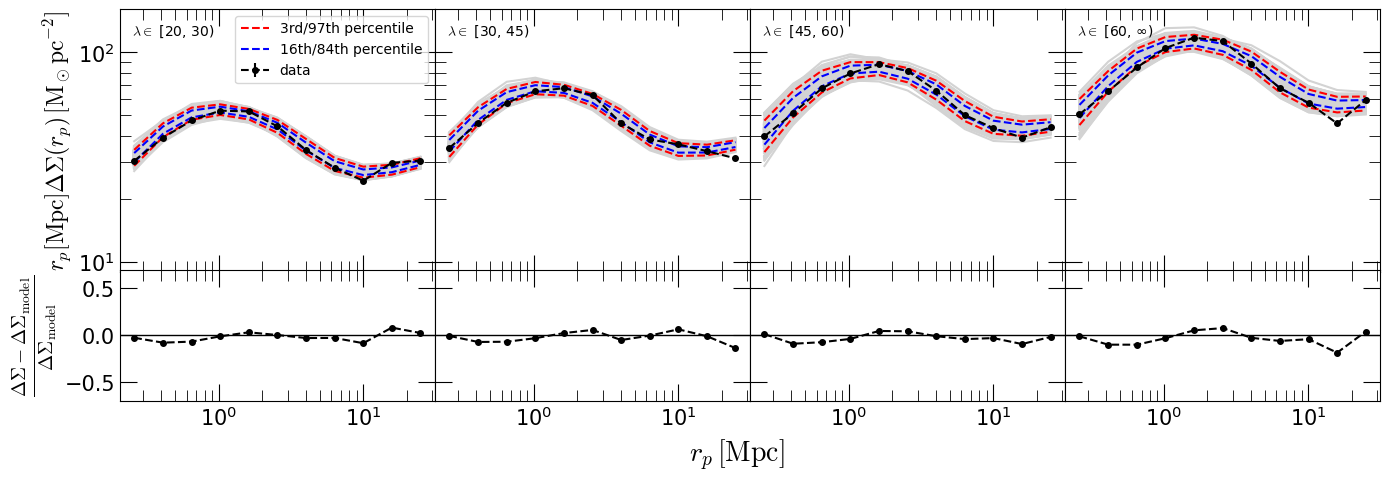

In [13]:
# Radial bins
inds = (rp > 0.2)*(rp < 999) 
rp1 = rp[inds]

label = ["data", "model"]
filepath = "/pscratch/sd/t/titus/MiniUchuu/mcmc_results/"
fname = "frac_diff_ds_mini_uchuu_all_scale" #frac difference between the data and posterior mean model for mini uchuu all scales
# fname = "frac_diff_ds_cylinder_richness_all_scale" #frac difference between the data and posterior mean model for mini uchuu cylinder richness data - all scales
# fname = f"frac_diff_ds_cylinder_richness_no_pec_vel_depth{cyl_depth}_all_scale"

# Setup figure and gridspec
fig = plt.figure(figsize=(14, 5))
gs = fig.add_gridspec(2, 4, height_ratios=[2, 1])  # For example, bottom panel is twice as tall as each top panel

# Create the first axis for the top row
axes_top = [fig.add_subplot(gs[0, 0])]

# Create remaining axes for the top row, sharing the y-axis with the first
for i in range(1, 4):
    axes_top.append(fig.add_subplot(gs[0, i], sharey=axes_top[0]))

# Create axes for the bottom row
axes_bottom = [fig.add_subplot(gs[1, i]) for i in range(4)]

lambdas = [23.99617, 35.86541, 51.21334, 81.45424]  # Example lambda values, adjust as necessary

for j, lam in enumerate(lambdas):
    lam_z_bin = "l"+str(j+3)+"_z0"
    
    Sigma_crit_inv0 = Sigma_crit_dic[lam_z_bin] #2.558834359999999819e-04 
    ds = load_ds_profiles[lam_z_bin]
    print(filepath+readerfile_dic[lam_z_bin])
    reader = emcee.backends.HDFBackend(filepath+readerfile_dic[lam_z_bin])
    samples = reader.get_chain()
    flat_samples = reader.get_chain(discard=burnin, flat=True)#[:,0]
    
    # Assuming flat_samples_c, rp1, and other necessary variables are defined
    model_ctk_profiles = []

    # Generate a list of unique random integers from the range
    indexes = random.sample(range(1000, len(flat_samples)), 5000) 
    
    # Step 2: Compute the DeltaSigma profile for each selected set of parameters
    for index in indexes:  # indexes already defined as a list of random indices
        index_params = flat_samples[index]
        # mass, concentration, B0, Rs, tau (miscentering offset), fmis, Am.
        log10_M, c, B0, Rs, tau, fmis, Am = index_params
        M = 10**log10_M #Msun/h

        Rlam = (lam/100)**0.2 #Mpc/h comoving #cluster radius assigned by redmapper
        Rmis = tau*Rlam #Mpc/h Radial miscentering offset. Cluster centers are wrongly identified by a distance Rmis.
        Rproj = np.logspace(-2, 2.4, num=1000, base=10) #Mpc/h Projected 2D radii. 
        R3d = np.logspace(-2, 3, num=1000, base=10) #Mpc/h comoving. 3D radii.

        # McClintock radial bins
        Rmin = 0.0323
        Rmax = 30
        nbins = 15

        Redges = np.logspace(np.log10(Rmin), np.log10(Rmax), nbins+1) #Projected radial bin edges
        Redges *= h*(1+z) #Converted to Mpc/h comoving

        """
        Note:
        Minimum Rproj for Sigma(Rproj) must be >= than min(r) of xi(r).
        Maximum Rproj for Sigma(Rproj) must be <= than max(r) of xi(r).
        Thus, the range of values for Rproj must be 
        equal to (or contained in) that of r
        """

        # Compute boost factors from cluster toolkit
        #Note: Rs is default in Mpc physical
        boost_model = ctk.boostfactors.boost_nfw_at_R(Rproj, B0, Rs*h*(1+z)) #theory

        #Specify k and z
        # k = np.logspace(-5, 3, num=4000) #Mpc^-1 comoving
        k = np.logspace(-5, np.log10(k_max), num=4000) #Mpc^-1 comoving
        # Power spectrum
        Pnonlin = np.array([cosmo_ctk.pk(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
        Plin = np.array([cosmo_ctk.pk_lin(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
        kh = k/h #h/Mpc comoving

        #P(k) are in Mpc^3/h^3 comoving
        #Thus, you will need to convert these to h/Mpc and (Mpc/h)^3 to use in the toolkit.
        Plin *= h**3
        Pnonlin *= h**3

        # NFW profile
        xi_nfw = ctk.xi.xi_nfw_at_r(R3d, M, c, Omega_m)

        # # Matter-matter correlation function (matter auto-correlation)
        xi_mm = ctk.xi.xi_mm_at_r(R3d, kh, Pnonlin)

        # 2-halo correlation function
        bias_term = ctk.bias.bias_at_M(M, kh, Plin, Omega_m) # Here, P must be linear.
        xi_2halo = ctk.xi.xi_2halo(bias_term, xi_mm)

        # Halo-matter correlation function
        xi_hm = ctk.xi.xi_hm(xi_nfw, xi_2halo)

        # Sigma (computed from xi_hm)
        Sigma = ctk.deltasigma.Sigma_at_R(Rproj, R3d, xi_hm, M, c, Omega_m) #Sigma

        # DeltaSigma (excess surface density)
        DS = ctk.deltasigma.DeltaSigma_at_R(Rproj, Rproj, Sigma, M, c, Omega_m) #DeltaSigma

        Sigma_mis  = ctk.miscentering.Sigma_mis_at_R(Rproj, Rproj, Sigma, M, c, Omega_m, Rmis, kernel="rayleigh") #miscentered Sigma profiles
        DS_mis = ctk.miscentering.DeltaSigma_mis_at_R(Rproj, Rproj, Sigma_mis) #miscentered Sigma profiles

        #full Sigma profile; i.e. miscentered + correctly centered Sigma profiles
        full_Sigma = (1-fmis)*Sigma + fmis*Sigma_mis 
        
        #full DeltaSigma profile; i.e. miscentered + correctly centered DeltaSigma profiles
        full_DS = (1-fmis)*DS + fmis*DS_mis 
        full_DS *= Am #multiplicative bias

        full_DS /= boost_model #de-boost the model

        Sigma_crit_inv = Sigma_crit_inv0
        Sigma_crit_inv *= h*(1+z)**2
        full_DS /= (1-full_Sigma*Sigma_crit_inv) #Reduced shear
        #Here, DeltaSigma is in Msun h/pc^2 comoving

        ave_DS = ctk.averaging.average_profile_in_bins(Redges, Rproj, full_DS)
        ave_DS *= h*(1+z)**2 #convert to Msun/pc^2 physical
        model_ctk_profiles.append(rp1*ave_DS[inds])

        if j == 0:
            axes_top[j].set_ylabel(r"$\rm \mathit{r_p}[\mathrm{Mpc}] \Delta\Sigma(\mathit{r_p})\,[M_\odot \mathrm{pc}^{-2}]$", fontsize=17)  # Set Y-label for the first column
            axes_bottom[j].set_ylabel(r"$\rm \frac{\Delta\Sigma - \Delta\Sigma_{model}}{\Delta\Sigma_{model}}$", fontsize=20)  # Set Y-label for the first column
        axes_top[j].plot(rp1, rp1*ave_DS[inds], "-", c='lightgrey')
        
        
    # Convert to numpy array for easier percentile computation
    model_ctk_profiles = np.array(model_ctk_profiles)

    # Step 4: Compute the 3rd and 97th percentiles
    percentile_3rd = np.percentile(model_ctk_profiles, 3, axis=0)
    percentile_97th = np.percentile(model_ctk_profiles, 97, axis=0)
    
    # Step 5: Compute the 3rd and 97th percentiles
    percentile_16th = np.percentile(model_ctk_profiles, 16, axis=0)
    percentile_84th = np.percentile(model_ctk_profiles, 84, axis=0)
    
    axes_top[j].plot(rp1, percentile_3rd, '--', c='red', label='3rd/97th percentile')
    axes_top[j].plot(rp1, percentile_97th, '--', c='red')
    axes_top[j].plot(rp1, percentile_16th, '--', c='blue', label='16th/84th percentile')
    axes_top[j].plot(rp1, percentile_84th, '--', c='blue')
    
    # frac diff
    frac_diff_ds = np.load(nbody_loc+fname+lam_z_bin+".npy")
    
    axes_top[j].set_ylim(9.0, 1.6e2)
    axes_top[j].loglog()
    axes_top[j].errorbar(rp1, rp1*ds[inds], yerr = np.zeros(len(rp1)), fmt = '--o', 
                         ms = 4.0, color = 'black', 
                         label = label[0])
    axes_top[j].text(0.25, 120.0, f"$\lambda \in$ {lambda_range[j]}", fontsize = 10)
    axes_bottom[j].set_xscale('log')
    axes_bottom[j].set_ylim(-0.7, 0.7)
    axes_bottom[j].plot(rp1, frac_diff_ds[inds], '--o', ms = 4.0, color = 'k')
    axes_bottom[j].axhline(y=0.0, color='k', linestyle='-', lw = 1)
    if j == 0:
        axes_top[j].legend(fontsize=10)
        
    # Convert to numpy array for easier percentile computation
    model_ctk_profiles = np.array(model_ctk_profiles)

# To avoid label clutter, hide y-tick labels for the top row axes except for the first one
for ax in axes_top[1:]:
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    
for ax in axes_top:
    plt.setp(ax.get_xticklabels(), visible=False)
    
for ax in axes_bottom[1:]:
    plt.setp(ax.get_yticklabels(), visible=False)

# Adjust layout and set a super title
plt.tight_layout()
# fig.suptitle(r'$\Delta\Sigma$ Profiles', fontsize=20)
fig.supxlabel(r"$\rm \mathit{r_p}\,[\mathrm{Mpc}]$", x = 0.53, y = 0.08, va='center', ha='center', fontsize=20)
plt.tight_layout(h_pad = -0.4, w_pad = 0.02)
plt.show()

## Varying concentration

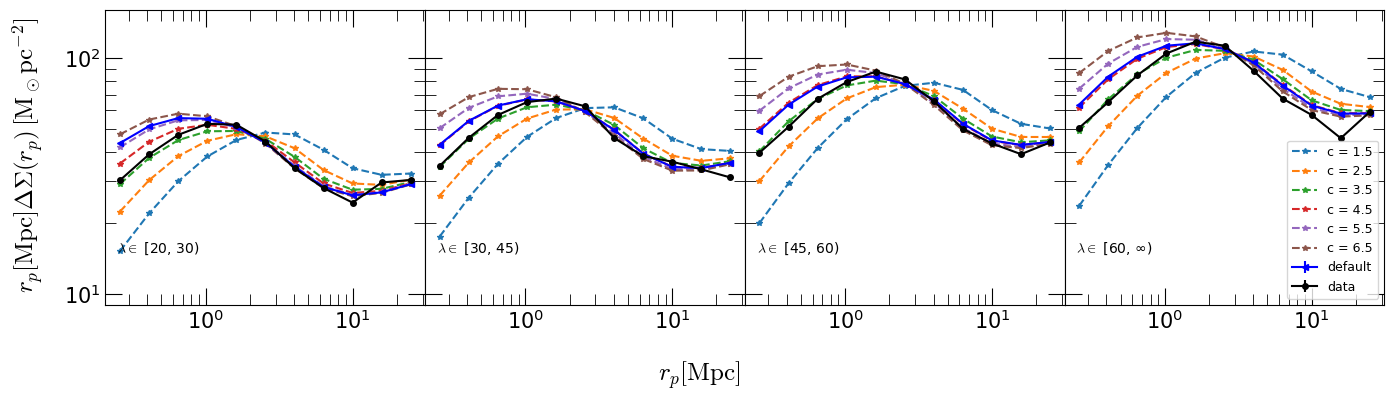

In [14]:
fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharey=True, sharex = True)

nbody_loc = '/global/u2/t/titus/Titus/Lensing/data/'
ds_data = np.load(nbody_loc+"saved_mini_uchuu_profiles_newdata_dic_mh_phys_units_final22.npy", allow_pickle=True).item()
ds_models = np.load(nbody_loc+"saved_mini_uchuu_profiles_no_sys_model_phys_units_final2.npy", allow_pickle=True).item()
lambda_range = ["[20, 30)", "[30, 45)", "[45, 60)", "[60, ∞)"]
lambdas = [23.99617, 35.86541, 51.21334, 81.45424]  # Example lambda values, adjust as necessary
z = 0.3

##newdata, true_mass*h
mean_mass_true_arr = {"l3_z0":1.971057e+14, "l4_z0":2.865907e+14, "l5_z0":4.064710e+14, "l6_z0":6.429285e+14} ##newdata, true_mass*h
con = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
col = ["blue", "green", "magenta", "cyan", "violet", "purple"]

rp = np.array([0.04221139,  0.06651455,  0.10516441,  0.16537565,  0.26069825, 
               0.41202975,  0.65045543,  1.02563815,  1.61857299,  2.55379112, 
               4.02731114,  6.34991963, 10.00980414, 15.784786  , 24.87216972])


for j, lam in enumerate(lambdas):
    lam_z_bin = "l"+str(j+3)+"_z0"
    
    ds = ds_data[lam_z_bin]
    ds_models0 = ds_models[lam_z_bin]
    
    M = mean_mass_true_arr[lam_z_bin]
    a = 1/(1+z) # scale factor
    c0 = concentration.concentration(M=M, mdef='200m', z=z, model = 'bhattacharya13') # 'bhattacharya13', 'bullock01'
    # print("M", M, "c", c0)
    
    for k in range(len(con)):

        c = con[k]
        color = col[k]

        Rproj = np.logspace(-2, 2.4, num=1000, base=10) #Mpc/h Projected 2D radii. 
        R3d = np.logspace(-2, 3, num=1000, base=10) #Mpc/h comoving. 3D radii.

        # rp in comoving Mpc/h
        Rmin = 0.0323 
        Rmax = 30 
        nbins = 15

        # rp1 = rp_
        Redges = np.logspace(np.log10(Rmin), np.log10(Rmax), nbins+1) #Projected radial bin edges
        Redges *= h*(1+z) #Converted to Mpc/h comoving

        #Specify k and z
        # k = np.logspace(-5, 3, num=4000) #Mpc^-1 comoving
        k = np.logspace(-5, np.log10(k_max), num=4000) #Mpc^-1 comoving
        
        # Power spectrum
        Pnonlin = np.array([cosmo_ctk.pk(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
        Plin = np.array([cosmo_ctk.pk_lin(ki, z) for ki in k])#*h**3  #Mpc^3/h^3 comoving
        kh = k/h #h/Mpc comoving

        #P(k) are in Mpc^3/h^3 comoving
        #Thus, you will need to convert these to h/Mpc and (Mpc/h)^3 to use in the toolkit.
        Plin *= h**3
        Pnonlin *= h**3

        # NFW profile
        xi_nfw = ctk.xi.xi_nfw_at_r(R3d, M, c, Omega_m)

        # Matter-matter correlation function (matter auto-correlation)
        xi_mm = ctk.xi.xi_mm_at_r(R3d, kh, Pnonlin)

         # 2-halo correlation function
        bias_term = ctk.bias.bias_at_M(M, kh, Plin, Omega_m) # Here, P must be linear.
        xi_2halo = ctk.xi.xi_2halo(bias_term, xi_mm)

        # Halo-matter correlation function
        xi_hm = ctk.xi.xi_hm(xi_nfw, xi_2halo)

        # Sigma (computed from xi_hm)
        Sigma = ctk.deltasigma.Sigma_at_R(Rproj, R3d, xi_hm, M, c, Omega_m) #Sigma

        # DeltaSigma (excess surface density)
        DS_theory = ctk.deltasigma.DeltaSigma_at_R(Rproj, Rproj, Sigma, M, c, Omega_m) #DeltaSigma
        # print(DS_theory)
        ave_DS = ctk.averaging.average_profile_in_bins(Redges, Rproj, DS_theory)
        ave_DS *= h*(1+z)**2 #convert to Msun/pc^2 physical

        # All scale
        inds1 = (rp >= 0.2)*(rp < 999) 
        # inds2 = (rp >= 0.1)*(rp < 0.2) 

        rp1 = rp[inds1]

        label = ["data", "posterior model"]
        axes[j].loglog()

        ########################
        axes[j].set_ylim(9.0, 1.6e2)

        axes[j].plot(rp1, rp1*ave_DS[inds1], "--", marker='*', ms = 4.0, label = f"c = {c}")#, color = color)
    axes[j].errorbar(rp1, rp1*ds_models0[inds1], yerr = np.zeros(len(rp1)), 
                     fmt = '-<', ms = 4.0, color = 'blue', label = "default") #:*, -.*, --*, -*
    axes[j].errorbar(rp1, rp1*ds[inds1], yerr = np.zeros(len(rp1)), fmt = '-o', 
                     ms = 4.0, color = 'black', label = label[0])
    axes[j].text(0.250, 15.0, f"$\lambda \in$ {lambda_range[j]}", fontsize = 10)

    if j == 3:
        axes[j].legend(fontsize=9)

# Add a super title, super x label, and super y label
# fig.suptitle(r'$\Delta\Sigma$ Profiles', fontsize=20)
fig.supxlabel(r"$\rm \mathit{r_p} [Mpc]$", fontsize=18)
fig.supylabel(r"$\rm \mathit{r_p} [Mpc] \Delta\Sigma(\mathit{r_p})\,[M_\odot \mathrm{pc}^{-2}]$", x = 0.02, y = 0.6, va='center', ha='center', fontsize=18)

# Adjust spacing between subplots
plt.tight_layout(h_pad = -1.0, w_pad = 0.0)
plt.show()